In [1]:
import os
import numpy as np
import glob as glob
import torch
from torch.utils.data import Dataset, Subset
from sklearn.model_selection import train_test_split
import multiprocessing

filepath = './tess_data'

c:\Users\socia\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# try the default kepler data loader in exonet.py
# reference: https://gitlab.com/frontierdevelopmentlab/exoplanets/exonet-pytorch/-/blob/master/exonet.py
class KeplerDataLoader(Dataset):
    
    '''
    
    PURPOSE: DATA LOADER FOR KERPLER LIGHT CURVES
    INPUT: PATH TO DIRECTOR WITH LIGHT CURVES + INFO FILES
    OUTPUT: LOCAL + GLOBAL VIEWS, LABELS
    
    '''

    def __init__(self, filepath):

        ### list of global, local, and info files (assumes certain names of files)
        self.flist_global = np.sort(glob.glob(os.path.join(filepath, '*global_flux.npy')))
        self.flist_local = np.sort(glob.glob(os.path.join(filepath, '*local_flux.npy')))
        self.flist_info = np.sort(glob.glob(os.path.join(filepath, '*info.npy')))
        
        print(len(self.flist_global))
        
        ### list of whitened centroid files
        self.flist_global_cen = np.sort(glob.glob(os.path.join(filepath, '*global_cen.npy')))
        self.flist_local_cen = np.sort(glob.glob(os.path.join(filepath, '*local_cen.npy')))
        
        ### ids = {TIC}_{TCE}
        self.ids = np.sort([(x.split('/')[-1]).split('_')[1] + '_' + (x.split('/')[-1]).split('_')[2] for x in self.flist_global])

    def __len__(self):

        return self.ids.shape[0]

    def __getitem__(self, idx):


        ### grab local and global views
        data_global = np.load(self.flist_global[idx]).astype(np.float32)
        data_local = np.load(self.flist_local[idx]).astype(np.float32)

        ### grab centroid views
        data_global_cen = np.load(self.flist_global_cen[idx]).astype(np.float32)
        data_local_cen = np.load(self.flist_local_cen[idx]).astype(np.float32)
        
        ### info file contains: [0]kic, [1]tce, [2]period, [3]epoch, [4]duration, [5]label)
        data_info = np.load(self.flist_info[idx])

        return (data_local, data_global, data_local_cen, data_global_cen, data_info[3:]), data_info[2]


In [3]:
tess_data = KeplerDataLoader(filepath = filepath)

3060


In [4]:
# look through some of the data
count = 0

for data in tess_data:
    print("len(data):", len(data))
    print("len(data[0]):", len(data[0]))
    print("shape data[0][0]: (data_local):", data[0][0].shape)
    print("shape data[0][1]: (data_global):", data[0][1].shape)
    print("shape data[0][2]: (data_local_cen):", data[0][2].shape)
    print("shape data[0][3]: (data_global_cen):", data[0][3].shape)
    print("shape data[0][4]: (data_info[6:]):", data[0][4].shape)
    print("data[1]:", data[1])
    print()

    count += 1
    if count == 2:
        break

len(data): 2
len(data[0]): 5
shape data[0][0]: (data_local): (61,)
shape data[0][1]: (data_global): (201,)
shape data[0][2]: (data_local_cen): (61,)
shape data[0][3]: (data_global_cen): (201,)
shape data[0][4]: (data_info[6:]): (17,)
data[1]: 1.0

len(data): 2
len(data[0]): 5
shape data[0][0]: (data_local): (61,)
shape data[0][1]: (data_global): (201,)
shape data[0][2]: (data_local_cen): (61,)
shape data[0][3]: (data_global_cen): (201,)
shape data[0][4]: (data_info[6:]): (17,)
data[1]: 1.0



In [6]:
# unload all of the data from pytorch dataset to numpy and save
x = []
y = []

curr = 0
total = len(tess_data)
print("Loading validation data:")
for x_data, y_data in tess_data:
    print(curr, "/", total)
    if not isinstance(y_data, np.float64):
        print(f'ERROR: {y_data}')
    curr += 1
    
    x.append(x_data)
    y.append(y_data)

Loading validation data:
0 / 3060
1 / 3060
2 / 3060
3 / 3060
4 / 3060
5 / 3060
6 / 3060
7 / 3060
8 / 3060
9 / 3060
10 / 3060
11 / 3060
12 / 3060
13 / 3060
14 / 3060
15 / 3060
16 / 3060
17 / 3060
18 / 3060
19 / 3060
20 / 3060
21 / 3060
22 / 3060
23 / 3060
24 / 3060
25 / 3060
26 / 3060
27 / 3060
28 / 3060
29 / 3060
30 / 3060
31 / 3060
32 / 3060
33 / 3060
34 / 3060
35 / 3060
36 / 3060
37 / 3060
38 / 3060
39 / 3060
40 / 3060
41 / 3060
42 / 3060
43 / 3060
44 / 3060
45 / 3060
46 / 3060
47 / 3060
48 / 3060
49 / 3060
50 / 3060
51 / 3060
52 / 3060
53 / 3060
54 / 3060
55 / 3060
56 / 3060
57 / 3060
58 / 3060
59 / 3060
60 / 3060
61 / 3060
62 / 3060
63 / 3060
64 / 3060
65 / 3060
66 / 3060
67 / 3060
68 / 3060
69 / 3060
70 / 3060
71 / 3060
72 / 3060
73 / 3060
74 / 3060
75 / 3060
76 / 3060
77 / 3060
78 / 3060
79 / 3060
80 / 3060
81 / 3060
82 / 3060
83 / 3060
84 / 3060
85 / 3060
86 / 3060
87 / 3060
88 / 3060
89 / 3060
90 / 3060
91 / 3060
92 / 3060
93 / 3060
94 / 3060
95 / 3060
96 / 3060
97 / 3060
98 / 

In [7]:
def train_test_split_dataset(data, target, train_ratio, validation_ratio, test_ratio):
    x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=1-train_ratio, shuffle=True, stratify=target)
    
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), shuffle=True, stratify=y_test)
    
    return x_train, y_train, x_test, y_test, x_val, y_val

In [8]:
x_train, y_train, x_test, y_test, x_val, y_val = train_test_split_dataset(x, y, 0.8, 0.1, 0.1)

In [9]:
import pandas as pd
pd.Series(y_val).value_counts()

1.0    254
0.0     52
dtype: int64

In [10]:
x_val = np.asarray(x_val, dtype=object)
y_val = np.asarray(y_val, dtype=np.float32)
x_train = np.asarray(x_train, dtype=object)
y_train = np.asarray(y_train, dtype=np.float32)

In [11]:
print(f'x_val shape: {x_val.shape}')
print(f'x_val[0][0] shape: {x_val[0][0].shape}')
print(f'x_val[0][1] shape: {x_val[0][1].shape}')
print(f'x_val[0][2] shape: {x_val[0][2].shape}')
print(f'x_val[0][3] shape: {x_val[0][3].shape}')
print(f'x_val[0][4] shape: {x_val[0][4].shape}')
print(f'y_val shape: {y_val.shape}')

x_val shape: (306, 5)
x_val[0][0] shape: (61,)
x_val[0][1] shape: (201,)
x_val[0][2] shape: (61,)
x_val[0][3] shape: (201,)
x_val[0][4] shape: (17,)
y_val shape: (306,)


In [12]:
from numpy import save
# save the validation data that was loaded
save("./outputs/val_x_data.npy", x_val)
save("./outputs/val_y_data.npy", y_val)
save("./outputs/train_x_data.npy", x_train)
save("./outputs/train_y_data.npy", y_train)

In [13]:
from numpy import load

x2_val = load("./outputs/val_x_data.npy", allow_pickle=True)
y2_val = load("./outputs/val_y_data.npy", allow_pickle=True)
x2_train = load("./outputs/train_x_data.npy", allow_pickle=True)
y2_train = load("./outputs/train_y_data.npy", allow_pickle=True)

In [14]:
print(x2_val.shape)
print(y2_val.shape)

(306, 5)
(306,)


In [15]:
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import GlobalMaxPool1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Softmax
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax, Nadam, SGD
from tensorflow.keras.utils import plot_model

In [16]:
print("Input shapes to the Extranet model:")
X_LOCAL_SHAPE = data[0][0].shape
print("X_LOCAL_SHAPE:", X_LOCAL_SHAPE)
X_GLOBAL_SHAPE = data[0][1].shape
print("X_GLOBAL_SHAPE:", X_GLOBAL_SHAPE)
X_LOCAL_CEN_SHAPE = data[0][2].shape
print("X_LOCAL_CEN_SHAPE:", X_LOCAL_CEN_SHAPE)
X_GLOBAL_CEN_SHAPE = data[0][3].shape
print("X_GLOBAL_CEN_SHAPE:", X_GLOBAL_CEN_SHAPE)
X_STARPARS_SHAPE = data[0][4].shape
print("X_STARPARS_SHAPE:", X_STARPARS_SHAPE)
print("Label:", data[1])

Input shapes to the Extranet model:
X_LOCAL_SHAPE: (61,)
X_GLOBAL_SHAPE: (201,)
X_LOCAL_CEN_SHAPE: (61,)
X_GLOBAL_CEN_SHAPE: (201,)
X_STARPARS_SHAPE: (17,)
Label: 1.0


In [17]:
FC_LOCAL_OUT_SHAPE = None
FC_GLOBAL_OUT_SHAPE = None
R_LEARN = 1e-5
print("Adam optimizer learning rate:", R_LEARN)

Adam optimizer learning rate: 1e-05


In [18]:
# fully connected global network used for Extranet
def create_fc_global():
    in_layer = Input(shape=(X_GLOBAL_SHAPE[0], 2))
    # unclear what the input shape should be
    # extranet has an input of 2 and concatenate the 2 inputs along dim 1

    fc = Conv1D(16, kernel_size=5, strides=1, padding='same')(in_layer)
    fc = Activation('relu')(fc)
    fc = Conv1D(16, kernel_size=5, strides=1, padding='same')(fc)
    fc = Activation('relu')(fc)
    fc = MaxPool1D(pool_size=5, strides=2)(fc)

    fc = Conv1D(32, kernel_size=5, strides=1, padding='same')(fc)
    fc = Activation('relu')(fc)
    fc = Conv1D(32, kernel_size=5, strides=1, padding='same')(fc)
    fc = Activation('relu')(fc)
    fc = MaxPool1D(pool_size=5, strides=2)(fc)

    fc = Conv1D(64, kernel_size=5, strides=1, padding='same')(fc)
    fc = Activation('relu')(fc)
    fc = Conv1D(64, kernel_size=5, strides=1, padding='same')(fc)
    fc = Activation('relu')(fc)
    fc = MaxPool1D(pool_size=5, strides=2)(fc)

    fc = Conv1D(128, kernel_size=5, strides=1, padding='same')(fc)
    fc = Activation('relu')(fc)
    fc = Conv1D(128, kernel_size=5, strides=1, padding='same')(fc)
    fc = Activation('relu')(fc)
    fc = MaxPool1D(pool_size=5, strides=2)(fc)

    fc = Conv1D(256, kernel_size=5, strides=1, padding='same')(fc)
    fc = Activation('relu')(fc)
    fc = Conv1D(256, kernel_size=5, strides=1, padding='same')(fc)
    fc = Activation('relu')(fc)
    out_layer = MaxPool1D(pool_size=5, strides=2)(fc)
    
    # save the shape
    FC_GLOBAL_OUT_SHAPE = out_layer.shape

    model = Model(inputs=in_layer, outputs=out_layer, name='fully_connected_global')
    return model, FC_GLOBAL_OUT_SHAPE

In [19]:
fc_global_model, FC_GLOBAL_OUT_SHAPE = create_fc_global()
fc_global_model.summary()
print()
print("Output shape:", FC_GLOBAL_OUT_SHAPE)

Model: "fully_connected_global"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 201, 2)]          0         
                                                                 
 conv1d (Conv1D)             (None, 201, 16)           176       
                                                                 
 activation (Activation)     (None, 201, 16)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 201, 16)           1296      
                                                                 
 activation_1 (Activation)   (None, 201, 16)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 99, 16)           0         
 )                                                               
                                            

In [20]:
plot_model(fc_global_model, to_file='fc_global_model.jpg', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [21]:
# fully connected global network used for Extranet
def create_fc_local():
    in_layer = Input(shape=(X_LOCAL_SHAPE[0], 2))
    # unclear what the input shape should be
    # extranet has an input of 2 and concatenate the 2 inputs along dim 1

    fc = Conv1D(16, kernel_size=5, strides=1, padding='same')(in_layer)
    fc = Activation('relu')(fc)
    fc = Conv1D(16, kernel_size=5, strides=1, padding='same')(fc)
    fc = Activation('relu')(fc)
    fc = MaxPool1D(pool_size=7, strides=2)(fc)
    #fc = Dropout(.25)(fc)

    fc = Conv1D(32, kernel_size=5, strides=1, padding='same')(fc)
    fc = Activation('relu')(fc)
    fc = Conv1D(32, kernel_size=5, strides=1, padding='same')(fc)
    fc = Activation('relu')(fc)
    out_layer = MaxPool1D(pool_size=7, strides=2)(fc)

    # save the shape
    FC_LOCAL_OUT_SHAPE = out_layer.shape

    model = Model(inputs=in_layer, outputs=out_layer, name='fully_connected_local')
    return model, FC_LOCAL_OUT_SHAPE

In [22]:
fc_local_model, FC_LOCAL_OUT_SHAPE = create_fc_local()
fc_local_model.summary()
print("\nOutput shape:", FC_LOCAL_OUT_SHAPE)

Model: "fully_connected_local"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 61, 2)]           0         
                                                                 
 conv1d_10 (Conv1D)          (None, 61, 16)            176       
                                                                 
 activation_10 (Activation)  (None, 61, 16)            0         
                                                                 
 conv1d_11 (Conv1D)          (None, 61, 16)            1296      
                                                                 
 activation_11 (Activation)  (None, 61, 16)            0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 28, 16)           0         
 1D)                                                             
                                             

In [23]:
(11*32)+(3*256)+6

1126

In [24]:
def create_final_layer(in_shape=(1137,)):
    # fully connected layers that combine local + global and does binary classification

    # input shape is flattened fc_local + fc_global + extra star parameters length
    '''
    input_length =  FC_LOCAL_OUT_SHAPE[1]  * FC_LOCAL_OUT_SHAPE[2]
    input_length += FC_GLOBAL_OUT_SHAPE[1] * FC_GLOBAL_OUT_SHAPE[2]
    input_length += X_STARPARS_SHAPE[0]
    print("Input length:", input_length)
    in_layer = Input(shape=(input_length,))
    '''
    in_layer = Input(shape=in_shape)
    fc = Dense(512, activation='relu')(in_layer)
    fc = Dense(512, activation='relu')(fc)
    fc = Dense(512, activation='relu')(fc)
    out_layer = Dense(1, activation='sigmoid')(fc)

    model = Model(in_layer, out_layer, name='final_layer_classifier')
    return model

In [25]:
final_layer_model = create_final_layer()
final_layer_model.summary()

Model: "final_layer_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1137)]            0         
                                                                 
 dense (Dense)               (None, 512)               582656    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 1,108,481
Trainable params: 1,108,481
Non-trainable params: 0
_________________________________________________________________


In [26]:
def ExtranetModelCopy():
    '''
    Extranet Model
    INPUT: 
        x_local
        x_global
        x_local_cen
        x_global_cen
        x_star
    OUTPUT:
        model used for binary classification
    '''
    print("Creating Extranet model")
    # read inputs to the model with given shapes
    x_local = Input(shape=X_LOCAL_SHAPE)
    x_local_cen = Input(shape=X_LOCAL_CEN_SHAPE)

    x_global = Input(shape=X_GLOBAL_SHAPE)
    x_global_cen = Input(shape=X_GLOBAL_CEN_SHAPE)

    x_star = Input(shape=X_STARPARS_SHAPE)

    # concatenate inputs respectively
    x_local_all = Concatenate(axis=1)([x_local, x_local_cen]) # these have to be concatenated to shape (X, 2)
    x_global_all = Concatenate(axis=1)([x_global, x_global_cen])
    
    #checking the shape after concat
    print("x_local_all.shape", x_local_all.shape)
    print("x_global_all.shape", x_global_all.shape)

    # reshape the concatenated inputs - **unsure if this reshapes correctly along axis**
    x_local_all = Reshape(target_shape=(x_local_all.shape[1]//2, 2))(x_local_all)
    x_global_all = Reshape(target_shape=(x_global_all.shape[1]//2, 2))(x_global_all)

    #checking the shape after concat
    print("\nShape after reshape")
    print("x_local_all.shape", x_local_all.shape)
    print("x_global_all.shape", x_global_all.shape)

    # call corresponding models
    fc_global, _ = create_fc_global()
    fc_local, _ = create_fc_local()
    
    # get outputs from feeing inputs to the models
    out_global = fc_global(x_global_all)
    out_local = fc_local(x_local_all)

    print("\nShape after model outputs")
    print("out_global.shape", out_global.shape)
    print("out_local.shape", out_local.shape)
    
    # do global pooling
    '''
    out_global = GlobalMaxPool1D() (out_global)
    out_local = GlobalMaxPool1D()(out_local)
    print("local shape after global pooling:", out_global.shape)
    '''
    # skipping global pooling bc the dimensionality reduction doesnt make sense to me now

    # flatten the outputs
    out_global = Flatten()(out_global)
    out_local = Flatten()(out_local)

    print("\nShape after flatten outputs")
    print("out_global.shape", out_global.shape)
    print("out_local.shape", out_local.shape)

    # concatenate local, global and stellar params
    out = Concatenate()([out_global, out_local, x_star])

    print("\nConcatenated out shape:", out.shape)
    print("(Should be", out_global.shape[1], "global +", out_local.shape[1], "local +", x_star.shape[1], 'stellar params)')
    # pass the flattened length to the input shape
    final_layer = create_final_layer(in_shape=(out.shape[1],)) # should be 16586

    out = final_layer(out)

    print("\nShape of output after final layer:", out.shape)

    model = Model([x_local, x_global, x_local_cen, x_global_cen, x_star], out, name='Extranet_model')
    opt = Adam(learning_rate=R_LEARN)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model


In [27]:
extranet = ExtranetModelCopy()

extranet.summary()

Creating Extranet model
x_local_all.shape (None, 122)
x_global_all.shape (None, 402)

Shape after reshape
x_local_all.shape (None, 61, 2)
x_global_all.shape (None, 201, 2)

Shape after model outputs
out_global.shape (None, 3, 256)
out_local.shape (None, 11, 32)

Shape after flatten outputs
out_global.shape (None, 768)
out_local.shape (None, 352)

Concatenated out shape: (None, 1137)
(Should be 768 global + 352 local + 17 stellar params)

Shape of output after final layer: (None, 1)
Model: "Extranet_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 201)]        0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 201)]        0           []                          

In [28]:
plot_model(extranet, to_file='extranet.jpg', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [29]:
# fully connected global network used for ExtranetXS
def create_fc_global():
    in_layer = Input(shape=(X_GLOBAL_SHAPE[0], 2))
    # unclear what the input shape should be
    # extranet has an input of 2 and concatenate the 2 inputs along dim 1

    fc = Conv1D(16, kernel_size=5, strides=1, padding='same')(in_layer)
    #fc = BatchNormalization()(fc)
    fc = Activation('relu')(fc)
    fc = MaxPool1D(pool_size=2, strides=2)(fc)
    #fc = Dropout(.5)(fc)

    fc = Conv1D(16, kernel_size=5, strides=1, padding='same')(fc)
    fc = Activation('relu')(fc)
    fc = MaxPool1D(pool_size=2, strides=2)(fc)
    #fc = Dropout(.5)(fc)

    fc = Conv1D(32, kernel_size=5, strides=1, padding='same')(fc)
    #fc = BatchNormalization()(fc)
    out_layer = Activation('relu')(fc)
    
    # save the shape
    FC_GLOBAL_OUT_SHAPE = out_layer.shape

    model = Model(inputs=in_layer, outputs=out_layer, name='fully_connected_global_xs')
    return model, FC_GLOBAL_OUT_SHAPE

In [30]:
#TODO: Determine input shape!!

def create_final_layer(in_shape=(81,)):
    # fully connected layers that combine local + global and does binary classification

    # input shape is flattened fc_local + fc_global + extra star parameters length
    in_layer = Input(shape=in_shape)
    fc = Dense(81, activation='relu')(in_layer)
    #fc = Dropout(.25)(fc)
    #fc = Dense(16, activation='relu')(fc)
    #fc = Dropout(.1)(fc)
    out_layer = Dense(1, activation='sigmoid')(fc)

    model = Model(in_layer, out_layer, name='final_layer_classifier_xs')
    return model


In [31]:
def ExtranetXSModelCopy():
    '''
    Extranet Model
    INPUT: 
        x_local
        x_global
        x_local_cen
        x_global_cen
        x_star
    OUTPUT:
        model used for binary classification
    '''
    print("Creating Extranet model")
    # read inputs to the model with given shapes
    x_local = Input(shape=X_LOCAL_SHAPE)
    x_local_cen = Input(shape=X_LOCAL_CEN_SHAPE)

    x_global = Input(shape=X_GLOBAL_SHAPE)
    x_global_cen = Input(shape=X_GLOBAL_CEN_SHAPE)

    x_star = Input(shape=X_STARPARS_SHAPE)

    # concatenate inputs respectively
    x_local_all = Concatenate(axis=1)([x_local, x_local_cen]) # these have to be concatenated to shape (X, 2)
    x_global_all = Concatenate(axis=1)([x_global, x_global_cen])
    
    #checking the shape after concat
    print("x_local_all.shape", x_local_all.shape)
    print("x_global_all.shape", x_global_all.shape)

    # reshape the concatenated inputs - **unsure if this reshapes correctly along axis**
    x_local_all = Reshape(target_shape=(x_local_all.shape[1]//2, 2))(x_local_all)
    x_global_all = Reshape(target_shape=(x_global_all.shape[1]//2, 2))(x_global_all)

    #checking the shape after concat
    print("\nShape after reshape")
    print("x_local_all.shape", x_local_all.shape)
    print("x_global_all.shape", x_global_all.shape)

    # call corresponding models
    fc_global, _ = create_fc_global()
    fc_local, _ = create_fc_local()
    
    # get outputs from feeing inputs to the models
    out_global = fc_global(x_global_all)
    out_local = fc_local(x_local_all)

    print("\nShape after model outputs")
    print("out_global.shape", out_global.shape)
    print("out_local.shape", out_local.shape)
    
    # do global pooling
    out_global = GlobalMaxPool1D() (out_global)
    out_local = GlobalMaxPool1D()(out_local)
    print("out global shape after global pooling:", out_global.shape)
    print("out local shape after global pooling:", out_local.shape)
    # skipping global pooling bc the dimensionality reduction doesnt make sense to me now

    # flatten the outputs
    out_global = Flatten()(out_global)
    out_local = Flatten()(out_local)

    print("\nShape after flatten outputs")
    print("out_global.shape", out_global.shape)
    print("out_local.shape", out_local.shape)

    # concatenate local, global and stellar params
    out = Concatenate()([out_global, out_local, x_star])

    print("\nConcatenated out shape:", out.shape)
    print("(Should be", out_global.shape[1], "global +", out_local.shape[1], "local +", x_star.shape[1], 'stellar params)')
    # pass the flattened length to the input shape
    final_layer = create_final_layer(in_shape=(out.shape[1],)) # should be 16586

    out = final_layer(out)

    print("\nShape of output after final layer:", out.shape)

    model = Model([x_local, x_global, x_local_cen, x_global_cen, x_star], out, name='ExtranetXS_model')
    opt = Adam(learning_rate=R_LEARN)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [41]:
extranetxs = ExtranetXSModelCopy()
extranetxs.summary()

Creating Extranet model
x_local_all.shape (None, 122)
x_global_all.shape (None, 402)

Shape after reshape
x_local_all.shape (None, 61, 2)
x_global_all.shape (None, 201, 2)

Shape after model outputs
out_global.shape (None, 50, 32)
out_local.shape (None, 11, 32)
out global shape after global pooling: (None, 32)
out local shape after global pooling: (None, 32)

Shape after flatten outputs
out_global.shape (None, 32)
out_local.shape (None, 32)

Concatenated out shape: (None, 81)
(Should be 32 global + 32 local + 17 stellar params)

Shape of output after final layer: (None, 1)
Model: "ExtranetXS_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 201)]        0           []                               
                                                                                                 

In [42]:
NUM_EPOCHS = 100
BATCH_SIZE = 32

In [43]:
x_features = [np.array([x[0] for x in x2_train]), 
              np.array([x[1] for x in x2_train]), 
              np.array([x[2] for x in x2_train]), 
              np.array([x[3] for x in x2_train]), 
              np.array([x[4] for x in x2_train])]

In [44]:

for i, feature in enumerate(x_features):
    for j, feature_set in enumerate(feature):
        if np.any(np.isnan(feature_set)):
            print(feature[j][0])


In [45]:
np.unique(y_train)
np.any(np.isnan(y_train))

False

In [47]:
class_weights = {0:0.83, 1:0.17}
history = extranetxs.fit(x=x_features, y=y_train, validation_split=0.2, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, class_weight=class_weights)


Epoch 1/100
62/62 [==============================] - 1s 10ms/step - loss: 0.2161 - val_loss: 0.9726
Epoch 2/100
62/62 [==============================] - 0s 7ms/step - loss: 0.2110 - val_loss: 0.9296
Epoch 3/100
62/62 [==============================] - 0s 7ms/step - loss: 0.2071 - val_loss: 0.8949
Epoch 4/100
62/62 [==============================] - 0s 7ms/step - loss: 0.2041 - val_loss: 0.8671
Epoch 5/100
62/62 [==============================] - 0s 7ms/step - loss: 0.2016 - val_loss: 0.8428
Epoch 6/100
62/62 [==============================] - 0s 7ms/step - loss: 0.1997 - val_loss: 0.8238
Epoch 7/100
62/62 [==============================] - 0s 6ms/step - loss: 0.1980 - val_loss: 0.8081
Epoch 8/100
62/62 [==============================] - 0s 7ms/step - loss: 0.1966 - val_loss: 0.7934
Epoch 9/100
62/62 [==============================] - 0s 7ms/step - loss: 0.1955 - val_loss: 0.7825
Epoch 10/100
62/62 [==============================] - 0s 7ms/step - loss: 0.1944 - val_loss: 0.7710
Epoch 11

In [48]:
val_features = [
    np.array([x[0] for x in x2_val]), 
    np.array([x[1] for x in x2_val]), 
    np.array([x[2] for x in x2_val]), 
    np.array([x[3] for x in x2_val]), 
    np.array([x[4] for x in x2_val])
]

for i, feature in enumerate(val_features):
    if np.any(np.isnan(feature[i])):
        print(i)

In [49]:
val_features = [
    np.array([x[0] for x in x2_val]), 
    np.array([x[1] for x in x2_val]), 
    np.array([x[2] for x in x2_val]), 
    np.array([x[3] for x in x2_val]), 
    np.array([x[4] for x in x2_val])
]
val_output = extranetxs.predict(val_features)

val_gt = y2_val.astype(None).ravel()
val_output = val_output.astype(None).ravel()
save("./outputs/train_y_output.npy", val_output)

10/10 [==============================] - 0s 2ms/step


In [50]:
val_output

array([0.6158694 , 0.32004273, 0.79221857, 0.3263402 , 0.68549871,
       0.67956609, 0.37672141, 0.33248714, 0.53902423, 0.47728008,
       0.37497672, 0.52130622, 0.60642874, 0.67957544, 0.63869733,
       0.63071597, 0.62321395, 0.464237  , 0.58233899, 0.61538494,
       0.55194438, 0.65170532, 0.63255757, 0.53616673, 0.4437454 ,
       0.65430319, 0.25823125, 0.40534496, 0.6716035 , 0.44599763,
       0.61092532, 0.71989375, 0.63745815, 0.11120214, 0.73936135,
       0.73045141, 0.41856456, 0.00107319, 0.6138767 , 0.67745066,
       0.47993246, 0.67513043, 0.59079993, 0.73292112, 0.44571263,
       0.4331103 , 0.5733012 , 0.69608206, 0.47559574, 0.23935579,
       0.47999874, 0.39573774, 0.74032158, 0.46368113, 0.53743827,
       0.48184958, 0.61280668, 0.51057684, 0.38391432, 0.55898851,
       0.58916861, 0.5909971 , 0.64749271, 0.50032729, 0.57368857,
       0.36494803, 0.62535173, 0.66186041, 0.50370675, 0.5257836 ,
       0.69579017, 0.43006715, 0.49477676, 0.53993595, 0.65322

In [51]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

########################################
####### CALCULATE STATISTICS ###########
########################################

### setup screen output
print("\nCALCULATING METRICS...\n")

### calculate average precision & precision-recall curves
AP = average_precision_score(val_gt, val_output, average=None)
# print("   average precision = {0:0.4f}\n".format(AP))

### calculate precision-recall curve
P, R, _ = precision_recall_curve(val_gt, val_output)

### calculate confusion matrix based on different thresholds
thresh = [0.5, 0.6, 0.7, 0.8, 0.9]
prec_thresh, recall_thresh = np.zeros(len(thresh)), np.zeros(len(thresh))

for n, nval in enumerate(thresh):
    pred_byte = np.zeros(len(val_output))
    for i, val in enumerate(val_output):
        if val > nval:
            pred_byte[i] = 1.0
        else:
            pred_byte[i] = 0.0
    prec_thresh[n] = precision_score(val_gt, pred_byte)
    recall_thresh[n] = recall_score(val_gt, pred_byte)
    print("   thresh = {0:0.2f}, precision = {1:0.2f}, recall = {2:0.2f}".format(thresh[n], prec_thresh[n], recall_thresh[n]))
    tn, fp, fn, tp = confusion_matrix(val_gt, pred_byte).ravel()
    print("      TN = {0:0}, FP = {1:0}, FN = {2:0}, TP = {3:0}".format(tn, fp, fn, tp))




CALCULATING METRICS...

   thresh = 0.50, precision = 0.91, recall = 0.70
      TN = 34, FP = 18, FN = 75, TP = 179
   thresh = 0.60, precision = 0.91, recall = 0.40
      TN = 42, FP = 10, FN = 152, TP = 102
   thresh = 0.70, precision = 0.97, recall = 0.11
      TN = 51, FP = 1, FN = 226, TP = 28
   thresh = 0.80, precision = 1.00, recall = 0.01
      TN = 52, FP = 0, FN = 252, TP = 2
   thresh = 0.90, precision = 0.00, recall = 0.00
      TN = 52, FP = 0, FN = 254, TP = 0


c:\Users\socia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


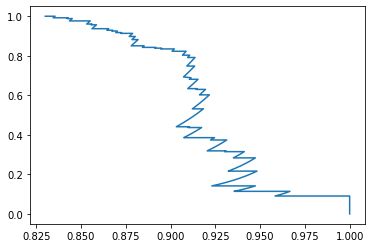

In [52]:
import matplotlib.pyplot as plt

plt.plot(P, R)

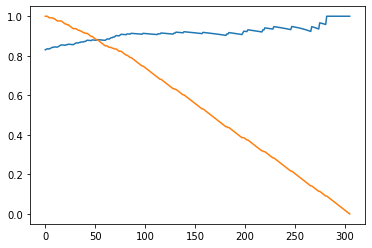

In [53]:
plt.plot(np.arange(len(P)), P)
plt.plot(np.arange(len(R)), R)

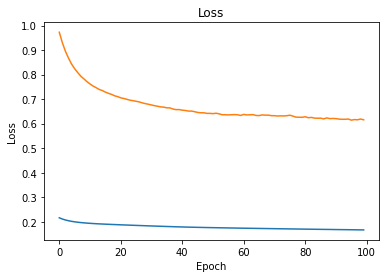

In [54]:
plt.plot(history.epoch,history.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.epoch, history.history['val_loss'])

In [74]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [45]:
import pandas as pd

In [47]:
pd.Series(y2_train).value_counts()

0.0    669
1.0    513
dtype: int64

In [88]:
3240+653

3893

In [92]:
417+71

488

In [93]:
71/488

0.14549180327868852